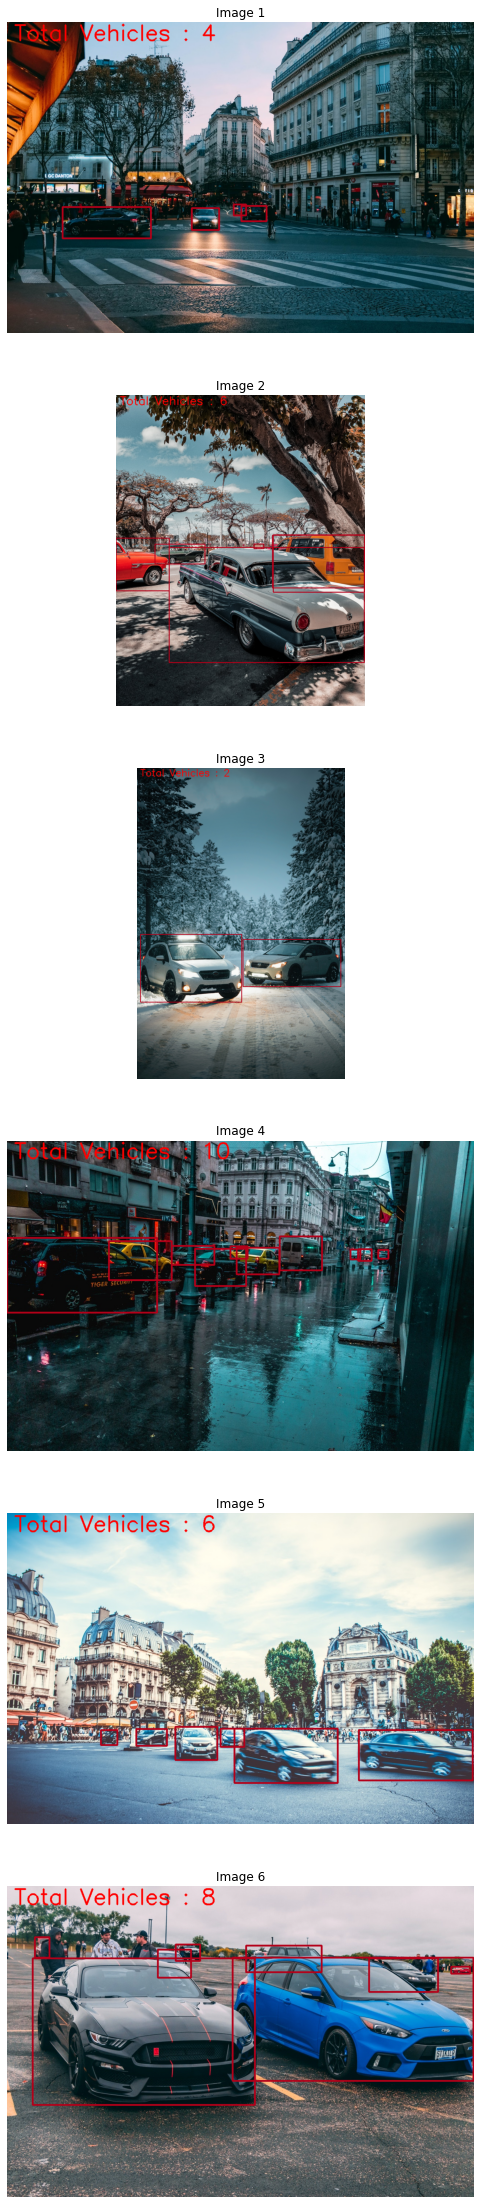

In [2]:
import cv2
import numpy as np
import glob

class VehicleDetector:

    def __init__(self):
        # Load Network
        net = cv2.dnn.readNet("dnn_model/yolov4.weights", "dnn_model/yolov4.cfg") # weights and cfg are of darknet
        self.model = cv2.dnn_DetectionModel(net)
        self.model.setInputParams(size=(832, 832), scale=1 / 255)


        # Allow classes containing Vehicles only
        self.classes_allowed = [2, 3, 5, 6, 7]


    def detect_vehicles(self, img):
        # Detect Objects
        vehicles_boxes = []
        class_ids, scores, boxes = self.model.detect(img, nmsThreshold=0.4)
        for class_id, score, box in zip(class_ids, scores, boxes):
            if score < 0.5:
                # Skip detection with low confidence
                continue

            if class_id in self.classes_allowed:
                vehicles_boxes.append(box)

        return vehicles_boxes



In [3]:
def showImage(img, imgName, scale_percent=30): # scale_percent is percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)  
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imshow(f"{imgName}", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [20]:


# Load Veichle Detector
vd = VehicleDetector()

# Load images from a folder
images_folder = glob.glob("images/*.jpg")

vehicles_folder_count = 0

imgDetected = []


# Loop through all the images
for img_path in images_folder:
    #print("Img path", img_path)
    img = cv2.imread(img_path)

    vehicle_boxes = vd.detect_vehicles(img)
    vehicle_count = len(vehicle_boxes)

    # Update total count
    vehicles_folder_count += vehicle_count

    for box in vehicle_boxes:
        x, y, w, h = box

        cv2.rectangle(img, (x, y), (x + w, y + h), (25, 0, 180), 3)

        cv2.putText(img, "Total Vehicles : " + str(vehicle_count), (20, 50), 0, 2, (0, 0, 255), 3)

    imgDetected.append(img)

    #showImage(img, 'Cars')
    


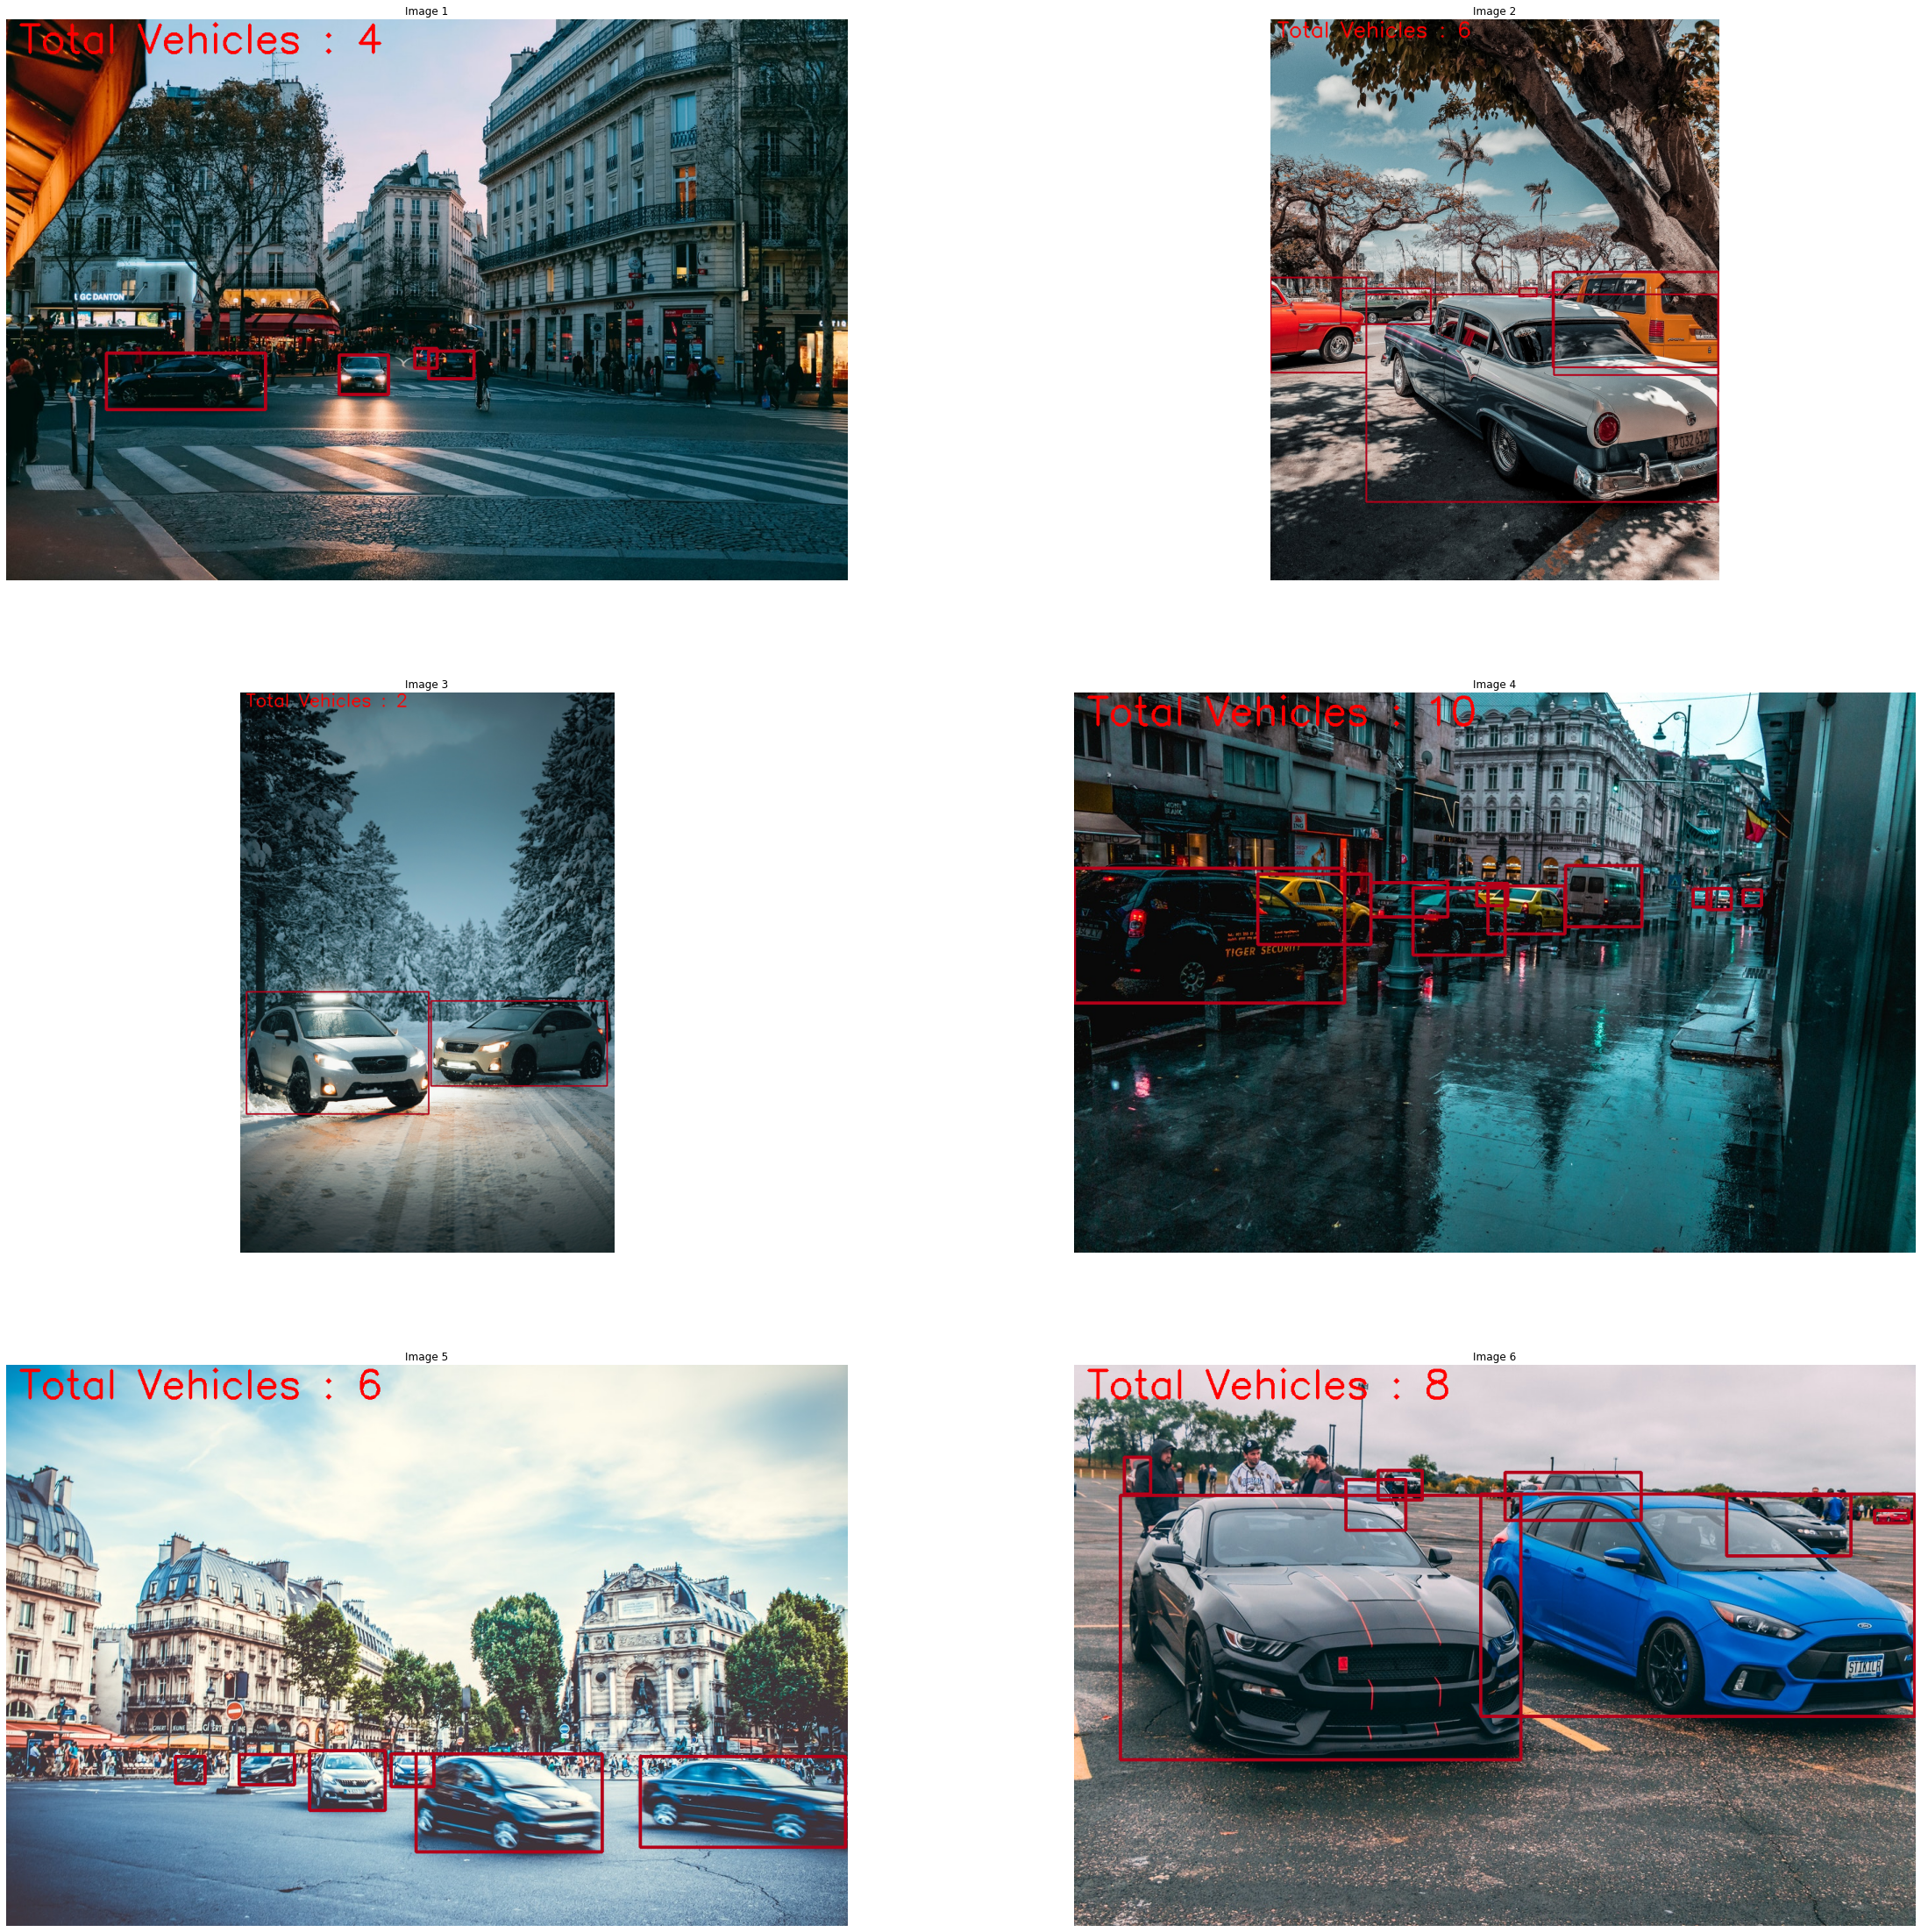

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(40, 40))


for i in range(6):
    fig.add_subplot(3, 2, i+1)

    # showing image
    plt.imshow(imgDetected[i][:,:,::-1])
    plt.axis('off')
    plt.title(f"Image {i+1}")
    
plt.show()
